In [1]:
# import libraries - EDA and PLOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("adult.csv")

# Part 1: Understanding / Cleaning Data

In [3]:
# display 5 lines of data
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# get information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Note **object means string data in pandas**

In [5]:
# replace nan value and count its freq
df = df.replace("?", np.NaN)
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
#drop nan values and reset index & verify
df = df.dropna(axis=0)
df.reset_index(drop = True, inplace = True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Notice : **our 4th value from earlier is dropped and the next value is shifted up**

In [7]:
#find target value/class
df['income'].value_counts(normalize=True)


<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

Notice: **approx 75% of data is earning less than or equal to 50K and only 25% i earning more than 50K.** <br>This gives us opportunity to model the problem as classification of 0(<=50k) and 1(>50K) <br>
But this can be done only after dealing with class imbalance

In [8]:
# map 0(<=50k) and 1(>50K)
df['income'] = df['income'].map({'<=50K':0, ">50K":1})

In [9]:
df['income'].value_counts(normalize=True)

0    0.752156
1    0.247844
Name: income, dtype: float64

In [10]:
# seprate string(object) and int datatype - filter
df_string = df.select_dtypes(include = "object")
df_int = df.select_dtypes(include = "int")

In [11]:
#verify string
df_string.describe(include = "all")

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


In [12]:
# check string values 
df_string.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States


Note: **ML models accepts value as integers, so we need to incode the above string as numbers using one-hot encoding**

In [13]:
# check int values
df_int.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,34,198693,6,0,0,30,0


In [14]:
# one hot encoding on string
df_string = pd.get_dummies(df_string)

In [15]:
# verfiy
df_string.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


----------
----------

# EDA - Explatory Data Analysis

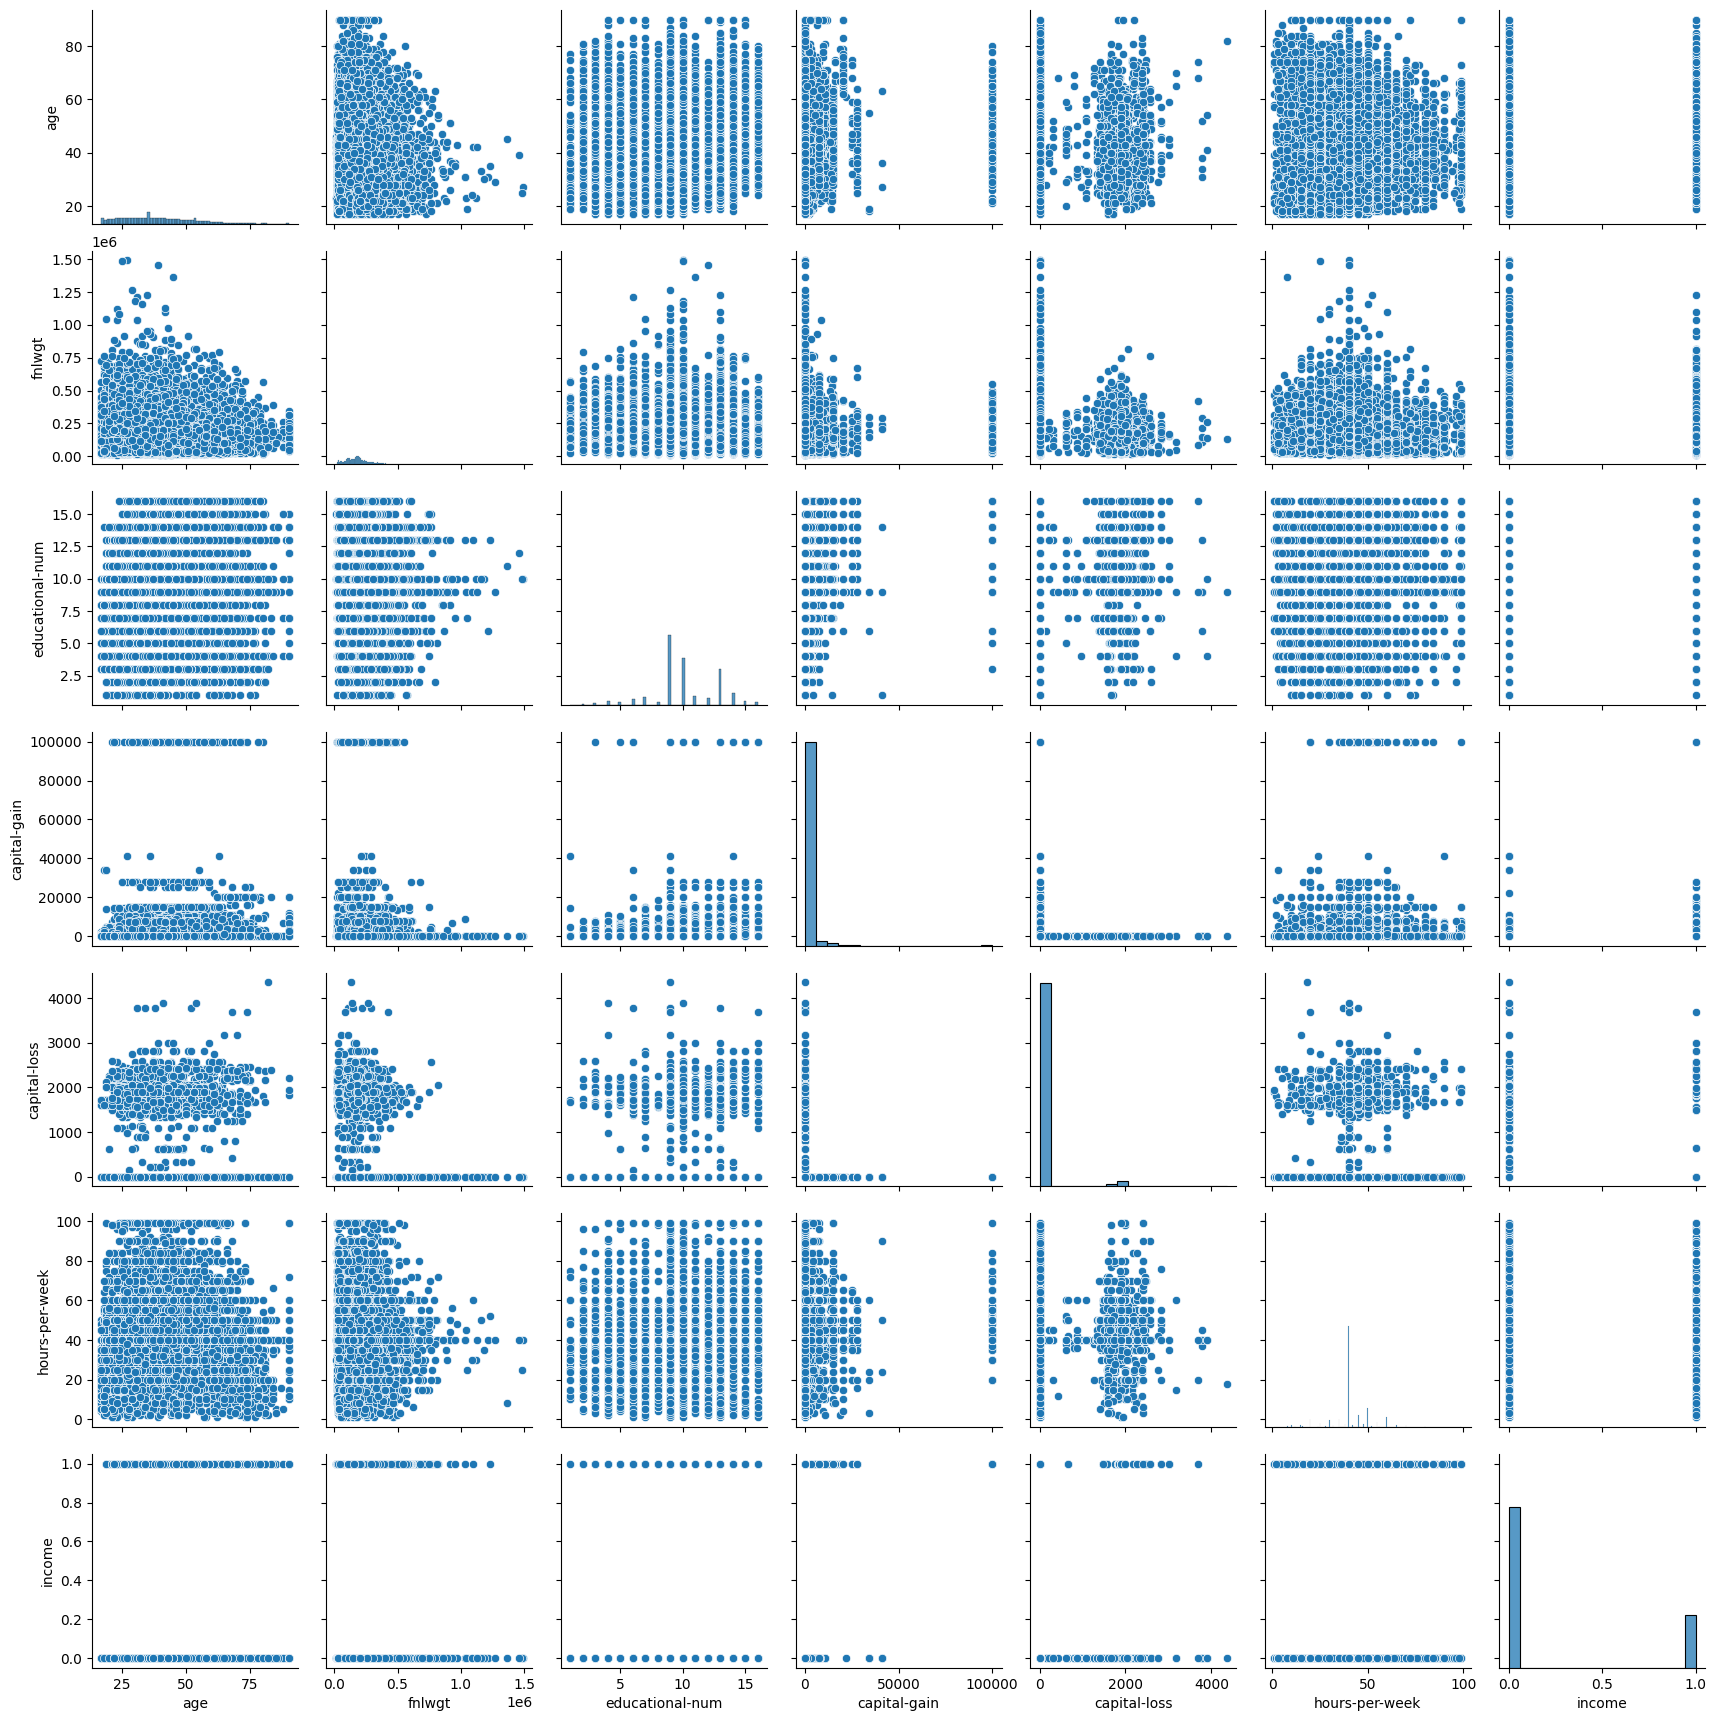

In [18]:
# plot pair plot to see the relationship between integer cols
sns.pairplot(df_int)

**income levels are in binary so 0 or 1 , see the last chart** 

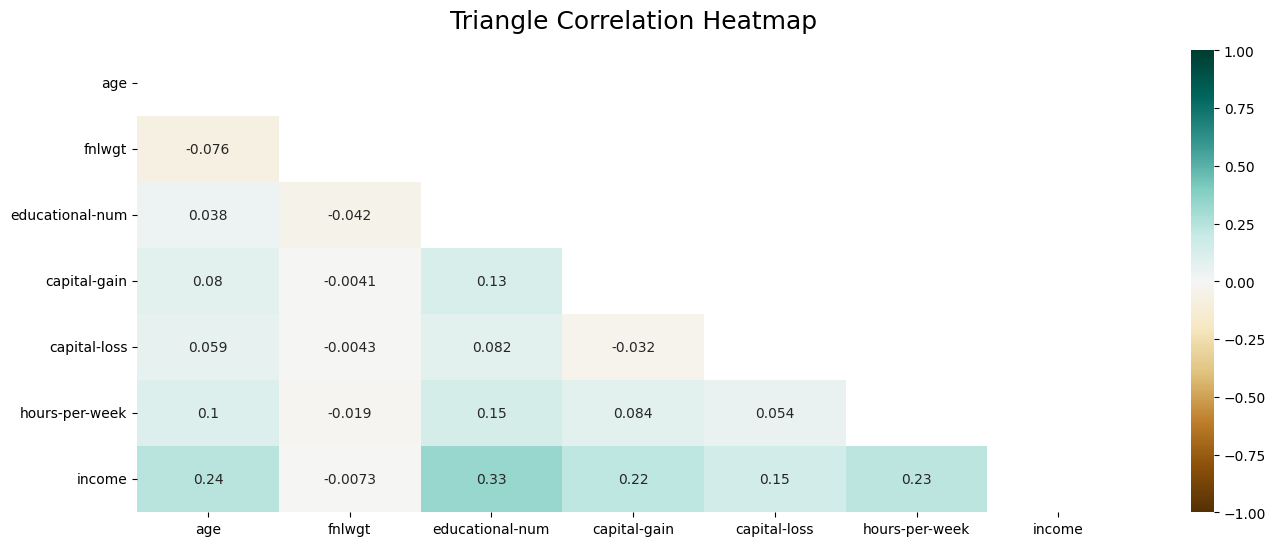

In [19]:
# plot the triangular heatmap

# get figure
plt.figure(figsize=(16,6))

# create a mask using triangular correl
mask = np.triu(np.ones_like(df_int.corr(), dtype = bool)) # converting all to booleans

# create heatmap
heatmap = sns.heatmap(df_int.corr(), mask = mask, vmin =-1, vmax=1, annot = True, cmap= "BrBG")
heatmap.set_title("Triangle Correlation Heatmap", fontdict = {'fontsize':18}, pad = 16);

**Correlation is not very large , max is 0.33, i.e education vs income**

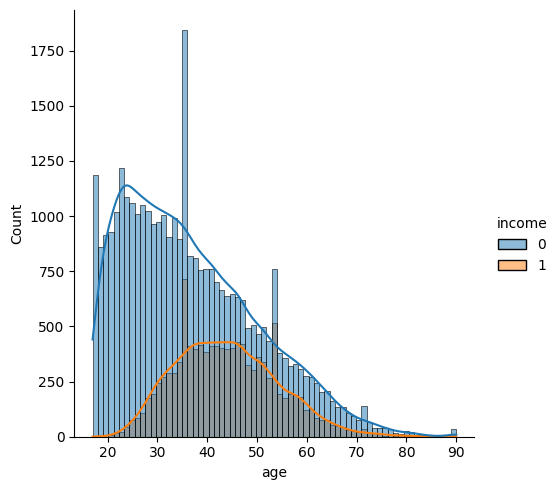

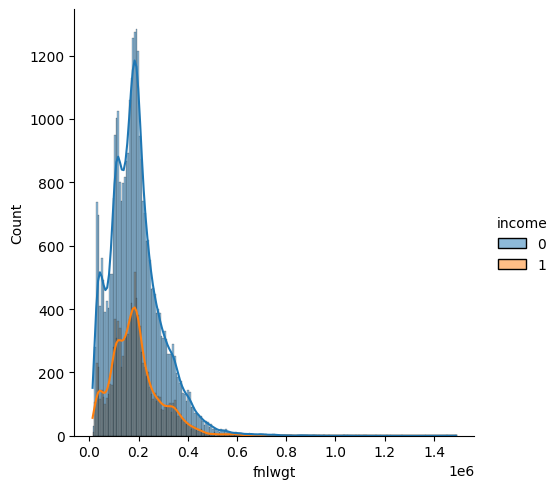

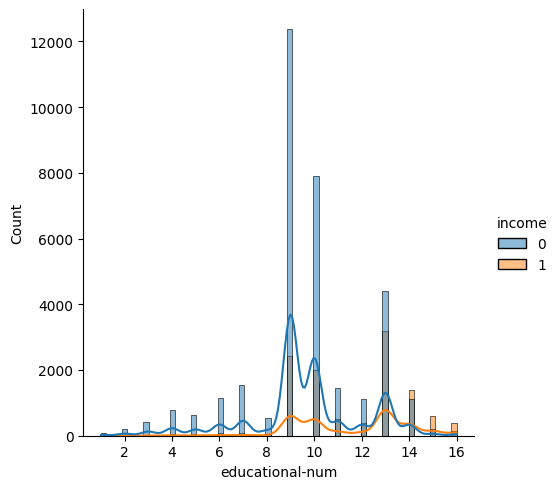

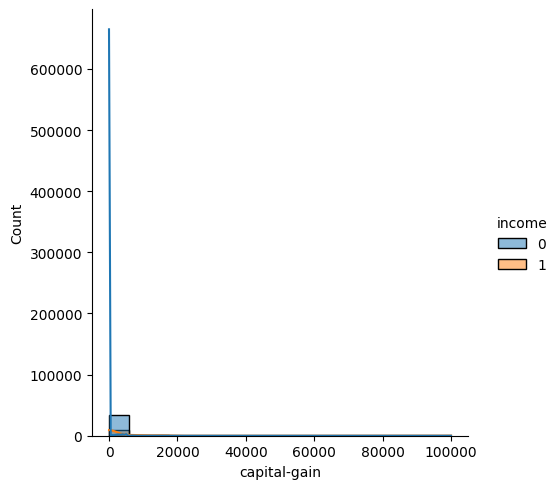

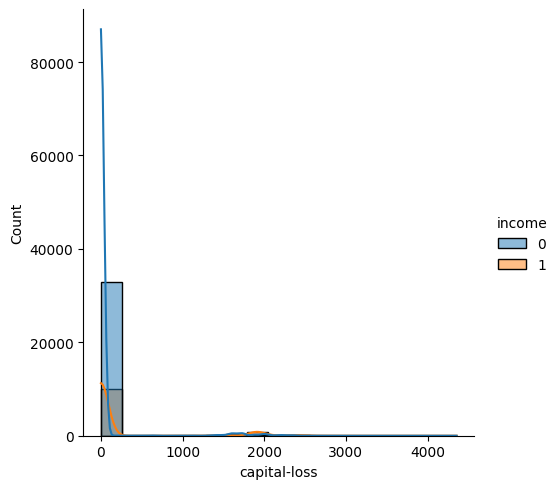

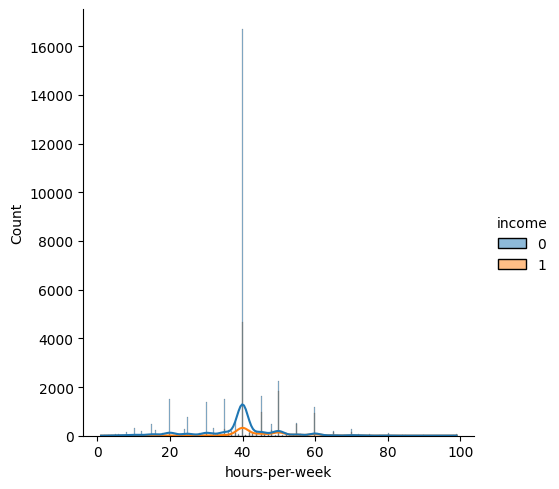

In [20]:
# distribution of data

# converting col to array list and iterate
for col in df_int.columns.to_list():
    if col !='income':
        # plot distribution
        sns.displot(x=col, hue="income", data = df_int, kde=True) 
    


**Data not distributed , most of data is right skewed**

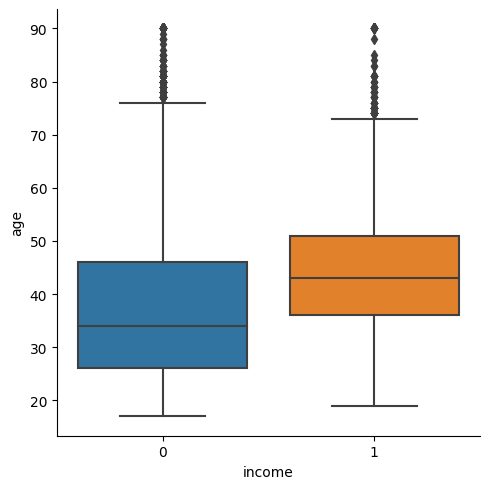

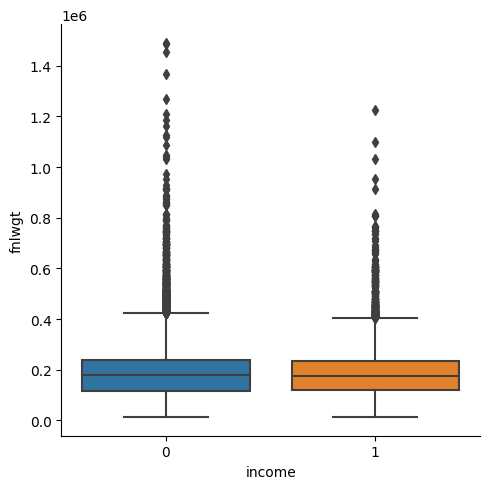

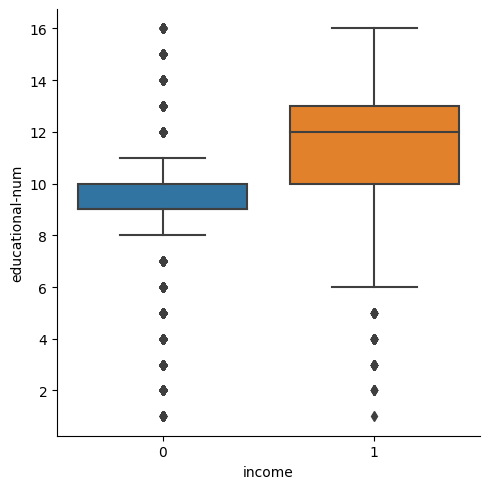

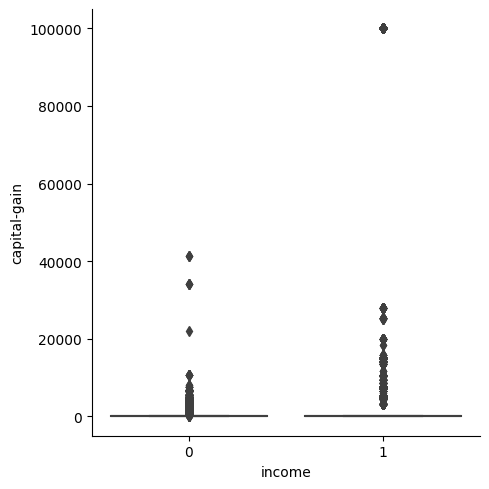

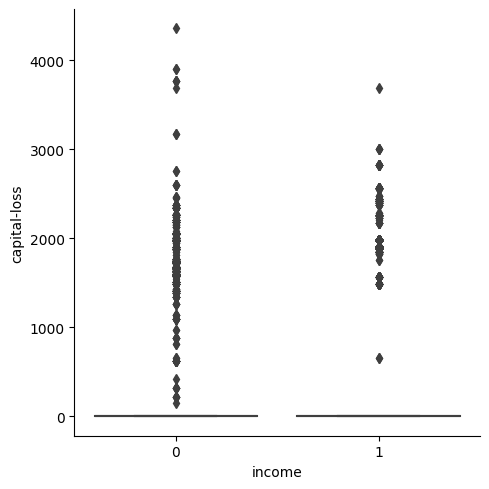

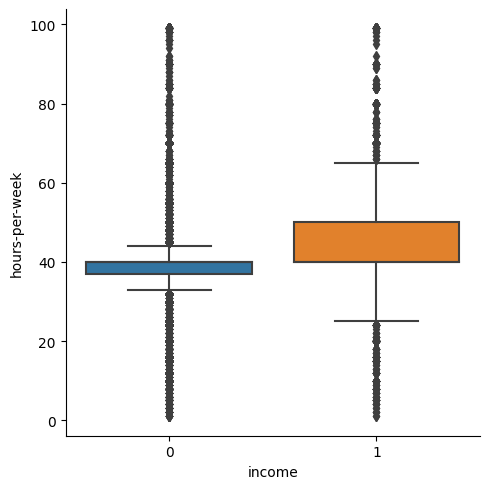

In [21]:
# check for outliers, compared to median using categorical plot
for col in df_int.columns.to_list():
    if col !='income':
        # plot distribution
        sns.catplot(x="income", y=col, kind = "box", data = df ) # we pass orignal data

**Remark**
many oultliers, compared to median data , droping not an option, as it will remove a lot of data, not good for modelling

-----------------
-----------------

# Part 3: Standard-Scaling / Min - Max Scaling

* In KNN , scaling is very important, as K relies on the distance from 1data point to another (eculedian distance).
* if feature colum has huge no, it will make distance quite large, hence adding a lot of bias to near data points

In [22]:
#import Standard Scalar from sklearn
from sklearn.preprocessing import StandardScaler

In [23]:
# preprocessing
y = df_int['income'] #target var
X = df_int.drop(columns = 'income') #features , not contain target
column_names = X.columns.values

In [24]:
#transformation
# create a scaler object
ss = StandardScaler() 

# perform scaling and transformation on features
X = ss.fit_transform(X)

In [25]:
# convert the returned tranformation into a data frame
X = pd.DataFrame(X)
X.columns = column_names 
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942


In [26]:
# concatenate all data across columnns
X = pd.concat([X, df_string], axis=1) # question!
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
X.isnull().sum()

age                               0
fnlwgt                            0
educational-num                   0
capital-gain                      0
capital-loss                      0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 104, dtype: int64

---------
---------

# Part 4: Modeling & Training

In [28]:
# import dependencies
from sklearn.model_selection import train_test_split

In [29]:
# split data as training and test split
# stratify : balaces the proportion of data in train and test set for unbalanced data

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify=y)

In [30]:
# import KNN Clasifier from KNN and instatate the clasifier object and train
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

In [31]:
# see predections
y_pred = knn.predict(X_test)

In [33]:
# check accuracy score
from sklearn.metrics import accuracy_score

In [34]:
# check accuracy score
accuracy_score(y_test, y_pred)

0.8233950025797891

# Part 5: Choosing Aprropriate Value Of K
* Will use Elbow Method and look for the turn

In [35]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

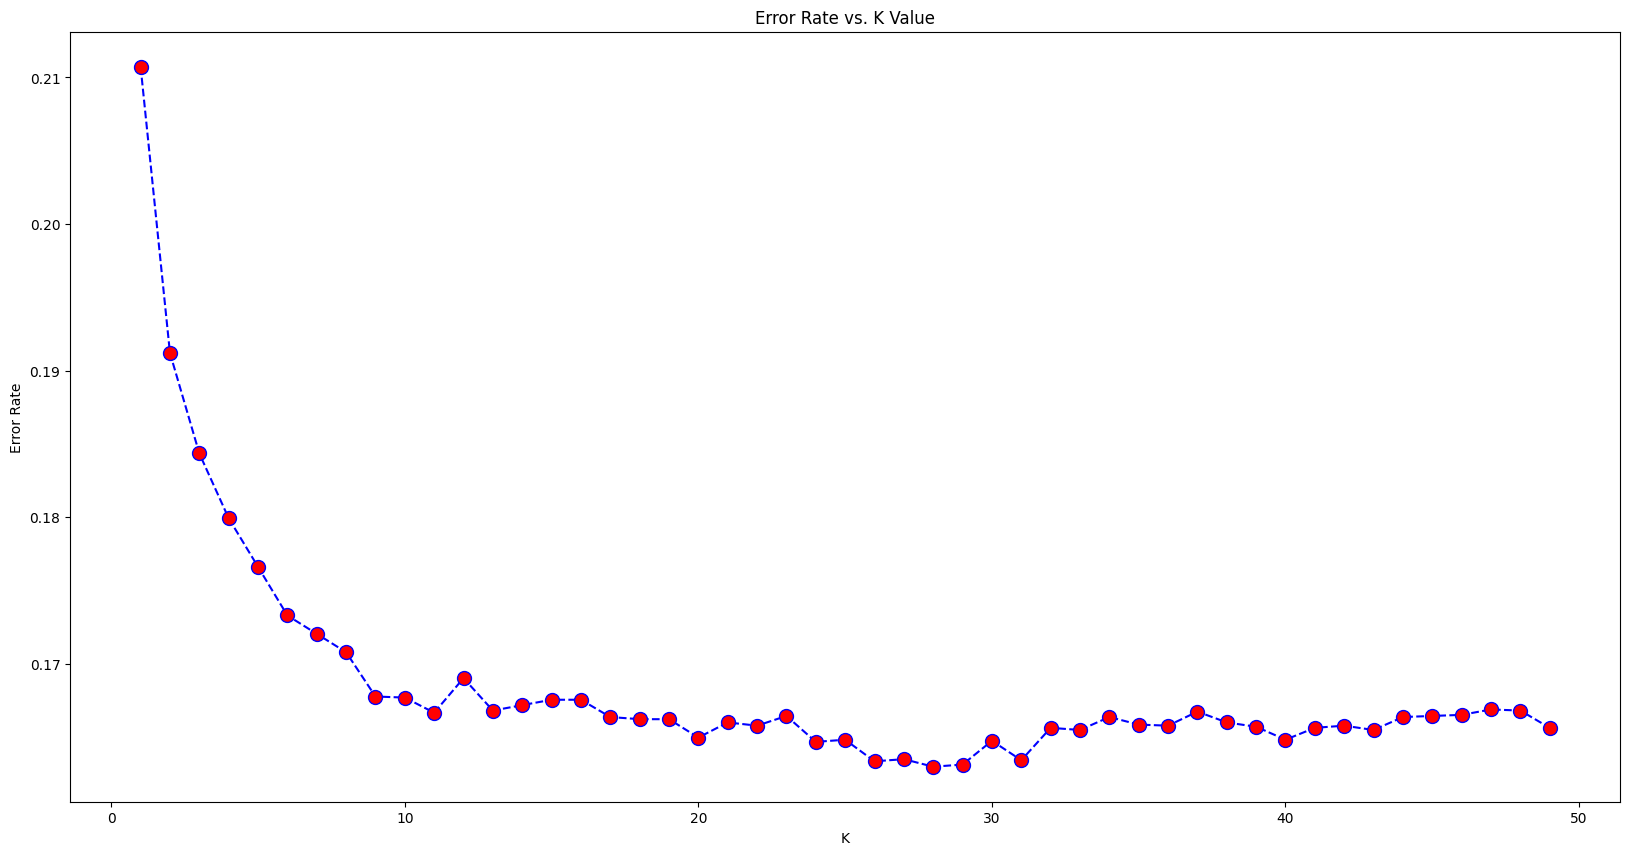

In [40]:
# plot figure
plt.figure(figsize =(20,10))
plt.plot(range(1,50), error_rate, color = "blue", linestyle="dashed", marker ="o",markerfacecolor="red", markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

**29 or 31 is a good value for K, - we will go with 29**

-------------
-------------

# Part 6 : Retrain With New K Value

New K - 29

In [43]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.8368836146532026

**accuracy is good, but one need to understand other metrics as dataset is not balanced**

In [56]:
# check for sensitivity , recall and F1 score
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
confusion_matrix(y_test, y_pred)

array([[9348,  857],
       [1356, 2006]], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     10205
           1       0.70      0.60      0.64      3362

    accuracy                           0.84     13567
   macro avg       0.79      0.76      0.77     13567
weighted avg       0.83      0.84      0.83     13567

